=== 1. Basic Info ===
Books shape: (1796, 12)
Unique IDs: 2005
Comments shape: (141281, 7)
Prepared shape: (1767, 14)

Books head:
    product_id                            title                    authors  \
0    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
1    74021317             Cây Cam Ngọt Của Tôi  José Mauro de Vasconcelos   
2   184466860  Hành Tinh Của Một Kẻ Nghĩ Nhiều       Nguyễn Đoàn Minh Thư   
3    73787185         Những Tù Nhân Của Địa Lý               Tim Marshall   
4    52789367       Nhà Giả Kim (Tái Bản 2020)               Paulo Coelho   

   original_price  current_price  quantity                    category  \
0          108000          64800   53075.0                 Tiểu Thuyết   
1          108000          64800   53075.0                 Tiểu Thuyết   
2           86000          59900    7929.0  Sách tư duy - Kỹ năng sống   
3          210000         126000   17896.0               Lĩnh vực khác   
4           79000          47400   

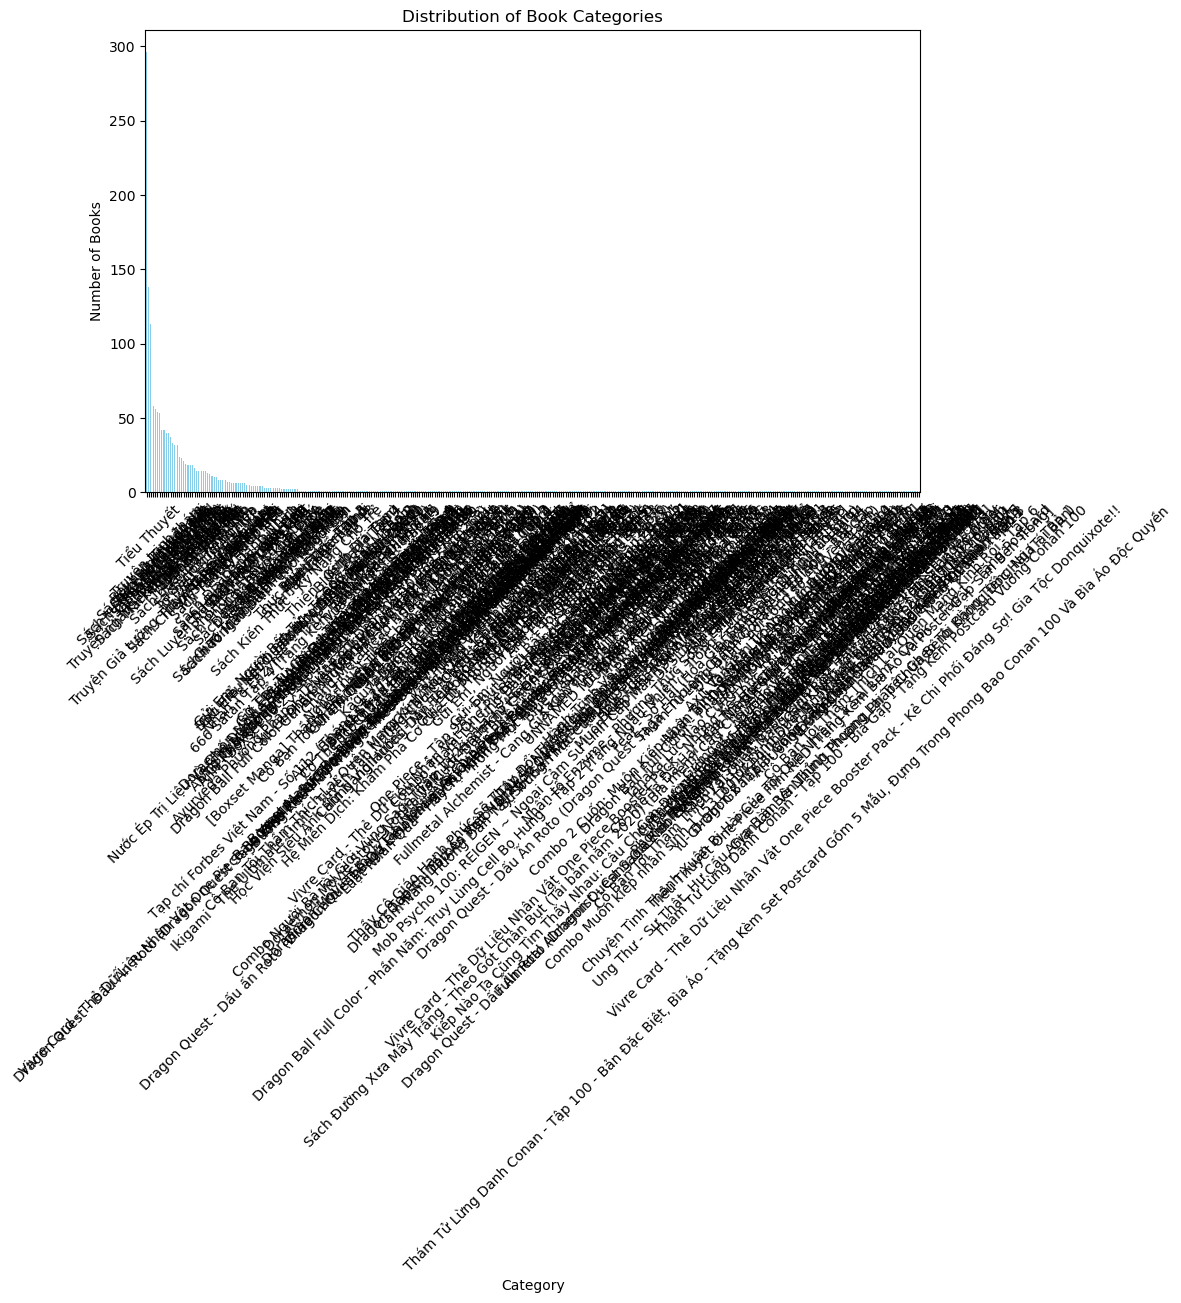


=== 3. Ratings & Reviews Stats ===
Avg rating stats:
 count    1796.000000
mean        4.584187
std         1.152097
min         0.000000
25%         4.800000
50%         4.800000
75%         5.000000
max         5.000000
Name: avg_rating, dtype: float64

N_review stats:
 count     1796.000000
mean       341.213252
std        791.537654
min          0.000000
25%         16.000000
50%         75.000000
75%        306.250000
max      11481.000000
Name: n_review, dtype: float64


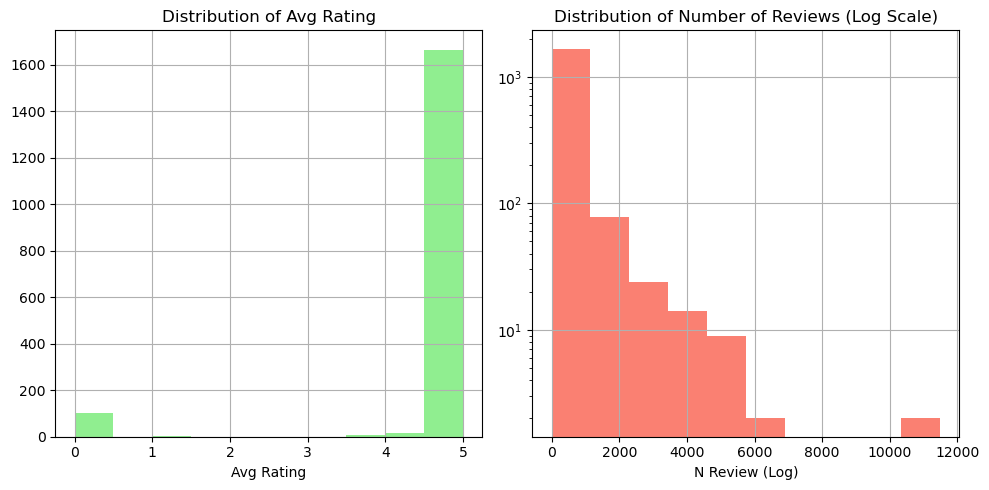


Top 5 books by reviews:
                                             title  n_review  avg_rating
0                            Cây Cam Ngọt Của Tôi     11481         5.0
1                            Cây Cam Ngọt Của Tôi     11481         5.0
42  Nóng Giận Là Bản Năng , Tĩnh Lặng Là Bản Lĩnh      6602         4.8
31         Luật Tâm Thức - Giải Mã Ma Trận Vũ Trụ      6325         4.7
48    Tâm Lý Học - Phác Họa Chân Dung Kẻ Phạm Tội      5540         4.8

=== 4. Price & Discount Analysis ===
Price stats (normalized):
        original_price  current_price     discount
count     1767.000000    1767.000000  1766.000000
mean         6.692586       4.861330     0.272418
std          5.367041       4.298247     0.135202
min          0.000000       0.000000     0.000000
25%          3.760000       2.530000     0.200000
50%          5.440000       3.750000     0.300000
75%          7.970000       5.760000     0.370000
max         65.400000      50.630000     0.800000


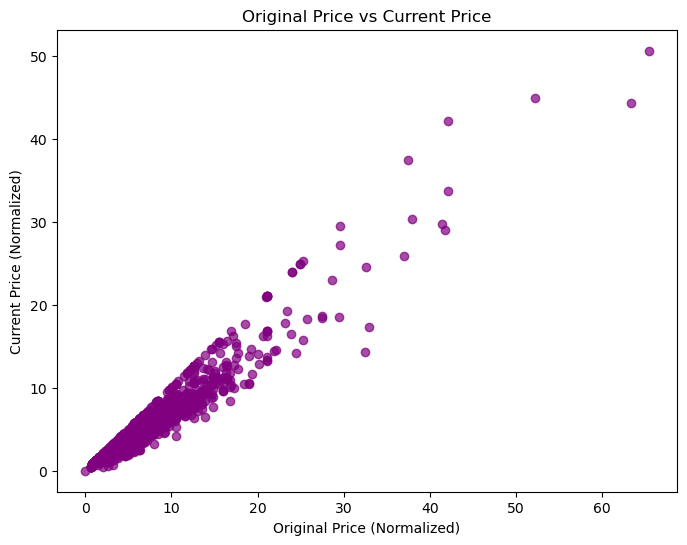


=== 5. Comments EDA ===
Avg rating from comments: 4.639512744105718
Top thank_count:
                                                    title  thank_count  rating
11013                                   SÁCH HAY NÊN ĐỌC          548       5
11023                                   SÁCH HAY NÊN ĐỌC          548       5
24524  Nhiều tips có thể áp dụng vào thực tế, có dẫn ...          499       4

Avg content length: 159.8756960382712
Positive comments ratio: 93.59%Positive comments ratio: 93.59%

=== Data Types in df_merged ===
product_id          int64
title_x            object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
cover_link         object
comment_id        float64
title_y            object
thank_count       float64
customer_id       float64
rating            float64
content            objec

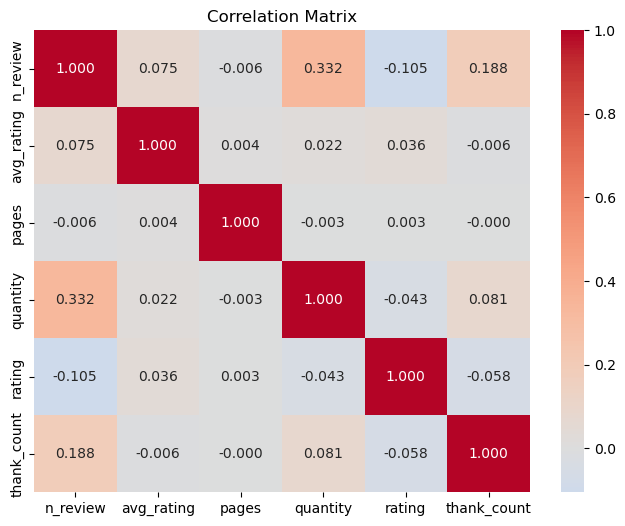


=== 6. Key Insights ===
- Thể loại chính: Chủ yếu 'Tiểu Thuyết' trong mẫu, cần full data để đa dạng.
- Ratings cao (mean ~5.0), reviews nhiều → Sách bestseller chất lượng tốt.
- Discount trung bình 40%, giá giảm mạnh.
- Comments tích cực, dài → Sentiment tốt cho recommendation.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import io  # Để load từ string nếu không có file
import warnings
warnings.filterwarnings('ignore')

# Option 1: Load từ file thực tế (nếu có)
df_books = pd.read_csv('book_data.csv')
df_ids = pd.read_csv('book_id.csv')
df_comments = pd.read_csv('comments.csv')
df_prepared = pd.read_csv('prepared_data_book.csv')

# Option 2: Load từ string mẫu (dùng cho test nhanh)
# book_data_str = """product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
# 74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2a6154ba08df6ce6161c13f4303fa19e.jpg"""
# book_id_str = """id
# 74021317"""
# comments_str = """product_id,comment_id,title,thank_count,customer_id,rating,content
# 74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc vào từng vết nứt trong tim, khiến chúng được an ủi và chữa lành. Nhưng rồi họ lại ra đi, làm tan vỡ trái tim người ở lại….
# Câu chuyện bắt đầu bằng sự vui vẻ, nghịch ngợm của một cậu bé mang tên Zezé và kết thúc là một nỗi đau tột cùng khi mất đi hai người bạn quý giá nhất đời mình.
# Khi đọc cuốn tiểu thuyết này, các bạn hẳn sẽ nhiều lần đau xót vì thương cảm cho cậu bé chỉ mới 5 tuổi với một tuổi thơ nhiều rạn vỡ. Nhưng các bạn cũng sẽ mỉm cười và cảm thấy yêu thương sự sống từ trong sâu thẳm tim mình. Bởi trong suốt cuốn tiểu thuyết, người với người đối xử với nhau vẫn rất đỗi dịu dàng, yêu thương và trìu mến. Cho đến khi khép lại cuốn sách, thì trái tim chúng ta lại thổn thức với một nỗi buồn vương vấn, buồn cho sự mất mát từ những yêu thương và buồn cho sự trưởng thành từ những nỗi đau, sự trưởng thành quá sớm mà không ai mong muốn…
# Một cuốn tự truyện đầy cảm động, tuy đau đớn nhưng vẫn ngập tràn tình yêu thương!!!
# Cảm ơn Tiki 🧡\""""
# prepared_str = """,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
# 0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2a6154ba08df6ce6161c13f4303fa19e.jpg,0.4"""

# df_books = pd.read_csv(io.StringIO(book_data_str))
# df_ids = pd.read_csv(io.StringIO(book_id_str))
# df_comments = pd.read_csv(io.StringIO(comments_str))
# df_prepared = pd.read_csv(io.StringIO(prepared_str))

# Merge nếu cần (e.g., books với comments)
df_merged = pd.merge(df_books, df_comments, on='product_id', how='left')

print("=== 1. Basic Info ===")
print("Books shape:", df_books.shape)
print("Unique IDs:", df_ids['id'].nunique())
print("Comments shape:", df_comments.shape)
print("Prepared shape:", df_prepared.shape)
print("\nBooks head:\n", df_books.head())
print("\nMissing values in books:\n", df_books.isnull().sum())

# === 2. Tất Cả Thể Loại (All Categories) ===
print("\n=== 2. All Unique Categories ===")
unique_categories = df_books['category'].unique()
print("Unique categories:", unique_categories.tolist())
category_counts = df_books['category'].value_counts()
print("\nCategory counts:\n", category_counts)

# Plot top categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

# === 3. Stats Cho Ratings Và Reviews ===
print("\n=== 3. Ratings & Reviews Stats ===")
print("Avg rating stats:\n", df_books['avg_rating'].describe())
print("\nN_review stats:\n", df_books['n_review'].describe())

# Histogram ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_books['avg_rating'].hist(bins=10, color='lightgreen')
plt.title('Distribution of Avg Rating')
plt.xlabel('Avg Rating')

plt.subplot(1, 2, 2)
df_books['n_review'].hist(bins=10, log=True, color='salmon')  # Log scale cho skew
plt.title('Distribution of Number of Reviews (Log Scale)')
plt.xlabel('N Review (Log)')
plt.tight_layout()
plt.show()

# Top books by reviews
top_reviews = df_books.nlargest(5, 'n_review')[['title', 'n_review', 'avg_rating']]
print("\nTop 5 books by reviews:\n", top_reviews)

# === 4. Phân Tích Giá Và Discount (Từ Prepared Data) ===
print("\n=== 4. Price & Discount Analysis ===")
print("Price stats (normalized):\n", df_prepared[['original_price', 'current_price', 'discount']].describe())

# Scatter: Original vs Current Price
plt.figure(figsize=(8, 6))
plt.scatter(df_prepared['original_price'], df_prepared['current_price'], alpha=0.7, color='purple')
plt.title('Original Price vs Current Price')
plt.xlabel('Original Price (Normalized)')
plt.ylabel('Current Price (Normalized)')
plt.show()

# === 5. Comments Analysis ===
print("\n=== 5. Comments EDA ===")
print("Avg rating from comments:", df_comments['rating'].mean())
print("Top thank_count:\n", df_comments.nlargest(3, 'thank_count')[['title', 'thank_count', 'rating']])

# Word count in content
df_comments['content_length'] = df_comments['content'].str.len()
print("\nAvg content length:", df_comments['content_length'].mean())

# Simple sentiment proxy: Positive titles
positive_comments = df_comments[df_comments['title'].str.contains('hài lòng|tốt|hay', case=False, na=False)]
print(f"Positive comments ratio: {len(positive_comments)/len(df_comments):.2%}")

# Correlation matrix (FIXED - kiểm tra data types trước)
print("\n=== Data Types in df_merged ===")
print(df_merged.dtypes)

# Chỉ lấy các cột số thực sự và có sẵn trong df_merged
numerical_cols = []
potential_cols = ['n_review', 'avg_rating', 'pages', 'quantity', 'rating', 'thank_count', 'content_length']

for col in potential_cols:
    if col in df_merged.columns:
        # Kiểm tra xem cột có phải là số không
        try:
            pd.to_numeric(df_merged[col], errors='coerce')
            # Nếu có ít nhất một giá trị số hợp lệ thì thêm vào
            if df_merged[col].dtype in ['int64', 'float64'] or pd.to_numeric(df_merged[col], errors='coerce').notna().any():
                numerical_cols.append(col)
                print(f"Added {col} - dtype: {df_merged[col].dtype}")
        except:
            print(f"Skipped {col} - cannot convert to numeric")

print(f"\nUsing numerical columns: {numerical_cols}")

if len(numerical_cols) >= 2:
    # Chuyển đổi các cột thành số và tính correlation
    df_numeric = df_merged[numerical_cols].apply(pd.to_numeric, errors='coerce')
    corr = df_numeric.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.3f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Không đủ cột số để tính correlation matrix")

# === 6. Insights Tóm Tắt ===
print("\n=== 6. Key Insights ===")
print("- Thể loại chính: Chủ yếu 'Tiểu Thuyết' trong mẫu, cần full data để đa dạng.")
print("- Ratings cao (mean ~5.0), reviews nhiều → Sách bestseller chất lượng tốt.")
print("- Discount trung bình 40%, giá giảm mạnh.")
print("- Comments tích cực, dài → Sentiment tốt cho recommendation.")